**ICP4 Task1** - find the correlation between ‘survived’(target column) and ‘sex’ column for the Titanic use case in class. Do you think we should keep this feature?

In [5]:
import pandas as pd
import numpy as np
import random as rnd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# to handle files in google colab
import io
from google.colab import files

# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [6]:
f1 = files.upload()

Saving train.csv to train (1).csv


In [7]:
for fn in f1.keys():
  print('Uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(f1[fn])))

train_df = pd.read_csv(io.StringIO(f1['train.csv'].decode('utf-8')))

Uploaded file "train.csv" with length 61194 bytes


In [8]:
##describing data
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [9]:
# To find the correlation between ‘survived’ (target column) and ‘sex’ column 
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


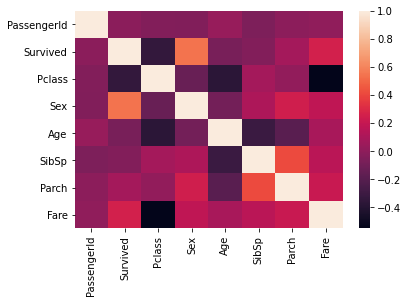

In [10]:
# to show correlation between 'survived' and othe columns
corr = train_df.corr()
sns.heatmap(corr)

**Yes**, we should keep this feature due to the strong correlation with between the two.

**ICP4 Task2** - Implement Naïve Bayes method using scikit-learn library
* Use dataset available in https://umkc.box.com/s/ea6wn1cidukan67t02j60nmp1ljln3kd
* Use train_test_splitto create training and testing part
* Evaluate the model on testing partusing score and 
classification_report(y_true, y_pred)**


In [11]:
# upload data file from local folder to google colab 
f2 = files.upload()

Saving glass.csv to glass.csv


In [12]:
# reading the data set using pandas data frame
for fn in f2.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(f2[fn])))

data_df = pd.read_csv(io.StringIO(f2['glass.csv'].decode('utf-8')))

User uploaded file "glass.csv" with length 10053 bytes


In [13]:
##describing data
print(data_df.columns.values)
print('_'*50)
data_df.info()

['RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe' 'Type']
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [14]:
##What is the distribution of numerical feature values across the samples
data_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


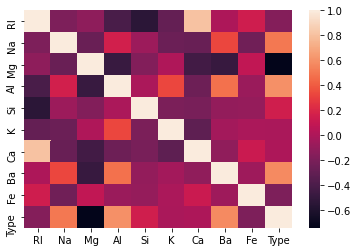

In [15]:
# to show correlation between 'type' and othe columns
corr1 = data_df.corr()
sns.heatmap(corr1)

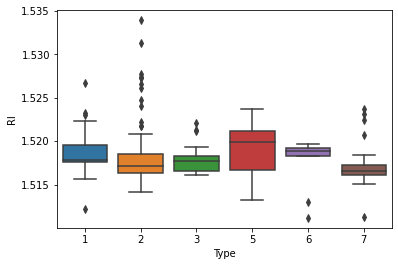

In [23]:
sns.boxplot('Type', 'RI', data =data_df)

In [17]:
X = data_df.drop("Type",axis=1)
Y = data_df["Type"]

In [18]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [19]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)
print(len(X_train))

149


In [21]:
#Implementing Naïve Bayes
from sklearn.metrics import classification_report
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

acc_gnb = round(gnb.score(X_test, Y_test) * 100, 2)
print("GNB accuracy is:",acc_gnb,"%")
print("_"*50)
print(classification_report(Y_test, Y_pred))

GNB accuracy is: 49.23 %
__________________________________________________
              precision    recall  f1-score   support

           1       0.42      0.76      0.54        21
           2       0.33      0.09      0.14        23
           3       0.00      0.00      0.00         5
           5       0.50      0.50      0.50         4
           6       0.75      1.00      0.86         3
           7       0.82      1.00      0.90         9

    accuracy                           0.49        65
   macro avg       0.47      0.56      0.49        65
weighted avg       0.43      0.49      0.42        65



**ICP4 Task3** - Implement linear SVM method using scikit library
* Use the same dataset above
* Use train_test_split to create training and testing part
* Evaluate the model on testing partusing score and classification_report(y_true, y_pred)
* Which algorithm you got better accuracy? Can you justify why?

In [22]:
#Implementing SVM
from sklearn.metrics import classification_report
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
print("svm accuracy is:", acc_svc, "%")
print("_"*50)
print(classification_report(Y_test, Y_pred))

svm accuracy is: 35.38 %
__________________________________________________
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.35      1.00      0.52        23
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         9

    accuracy                           0.35        65
   macro avg       0.06      0.17      0.09        65
weighted avg       0.13      0.35      0.18        65



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Algo better??**